In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.linear_model import LinearRegression
import os
from pathlib import Path


# Set figure parameters
fig_width = 3.25 #ECS spec is 3.25" width
fig_height = (3/4)*fig_width # standard ratio
rcParams['lines.markersize'] = 5
rcParams['lines.linewidth'] = 1.0
rcParams['font.size'] = 7
rcParams['legend.fontsize'] = 7
rcParams['legend.frameon'] = False
rcParams['font.sans-serif'] = 'Arial'
rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.rm'] = 'Arial'
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
rcParams['xtick.bottom'] = False
rcParams['ytick.direction'] = 'in' 




['CEL00141_RPT2_127.0.0.1-BTS83-32-2-3-2818573824.xlsx', 'CEL00142_RPT2_127.0.0.1-BTS83-32-2-4-2818573824.xlsx', 'CEL00143_RPT2_127.0.0.1-BTS83-32-2-5-2818573824.xlsx', 'CEL00144_RPT2_127.0.0.1-BTS83-32-2-6-2818573824.xlsx', 'CEL00145_RPT2_127.0.0.1-BTS83-32-2-7-2818573824.xlsx']


/Users/jinhong/.pyenv/versions/3.11.9/envs/glimpse_env3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/jinhong/.pyenv/versions/3.11.9/envs/glimpse_env3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/jinhong/.pyenv/versions/3.11.9/envs/glimpse_env3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/jinhong/.pyenv/versions/3.11.9/envs/glimpse_env3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Wor

   1st_char  1st_dis  2nd_char  2nd_dis  3rd_char  3rd_dis
0    3.7484   3.7171    3.7683   3.6939    3.7912   3.6279
1    3.7481   3.7159    3.7674   3.6930    3.7903   3.6275
2    3.7475   3.7140    3.7664   3.6914    3.7888   3.6226
3    3.7481   3.7156    3.7671   3.6936    3.7888   3.6282
4    3.7494   3.7174    3.7692   3.6942    3.7919   3.6291
   1st_char  1st_dis  2nd_char  2nd_dis  3rd_char  3rd_dis
0    3.1221   3.0740    3.0298   2.9758    2.7923   2.7542
1    3.1083   3.0757    3.0297   2.9798    2.7942   2.7587
2    3.1238   3.0933    3.0381   2.9894    2.7914   2.7563
3    3.1355   3.1036    3.0420   2.9922    2.8020   2.7669
4    3.1313   3.0971    3.0380   2.9882    2.7967   2.7616


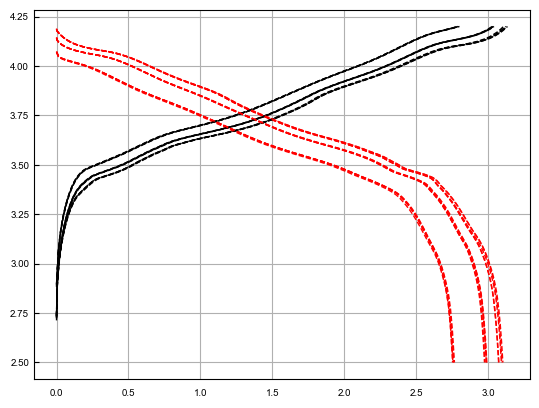

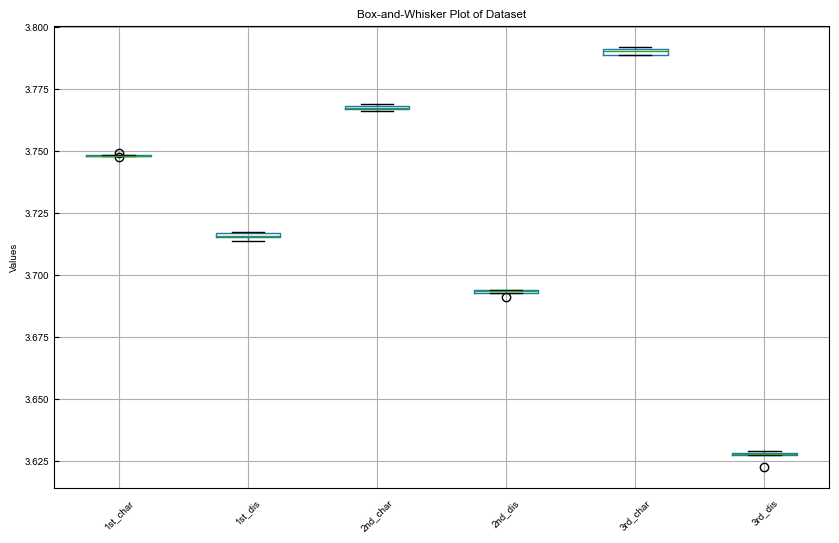

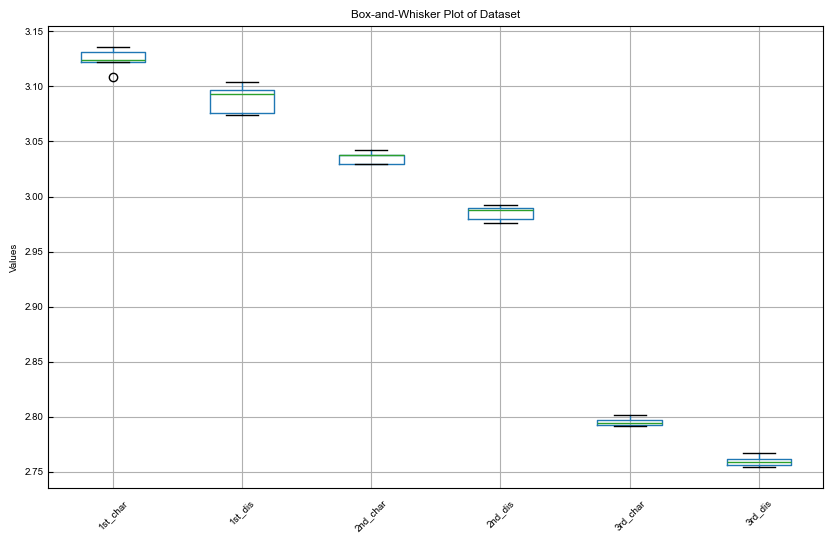

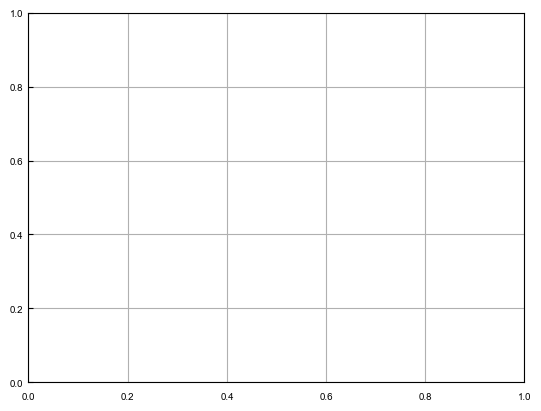

In [2]:
folder_path = os.getcwd()
files = os.listdir(folder_path)

excel_files = [file for file in files if file.endswith('.xlsx') or file.endswith('.xls')]
excel_files_sort = sorted(excel_files)
print(excel_files_sort)

OP_50 = {0: [], 1: [], 2: [], 3: [], 4: [], 5: []}
capacity = {0: [], 1: [], 2: [], 3: [], 4: [], 5: []}


for file in excel_files_sort[:]:
    file_path = os.path.join(folder_path, file)
    
    df = pd.read_excel(file_path, header=0, sheet_name='record')

    def filter_data(df, step_index):
        filtered_df = df[df['Step Index'].isin([step_index])]
        filtered_df.reset_index(drop=True, inplace=True)
        voltage_data = filtered_df['Voltage(V)']
        capacity_data = filtered_df['Capacity(Ah)']
        
        return voltage_data, capacity_data

    for i, step_index in enumerate([4, 8, 12]):
        filtered_df = filter_data(df, step_index)

    
        plt.plot(filtered_df[1], filtered_df[0] , linestyle='--', linewidth=1, label='Charge', color='black')
    
    for i, step_index in enumerate([6, 10, 14]):
        filtered_df = filter_data(df, step_index)

    
        plt.plot(filtered_df[1], filtered_df[0] , linestyle='--', linewidth=1, label='Charge', color='red')
        plt.grid()


    for i, step_index in enumerate([4, 6, 8, 10, 12, 14]):
        filtered_df = filter_data(df, step_index)
        Capacity = filtered_df[1].iloc[-1]
        Capacity_half = Capacity / 2 
        Mid_capacity_index = ((filtered_df[1] - Capacity_half).abs().idxmin())
        Mid_capacity_voltage = filtered_df[0].iloc[Mid_capacity_index]

        # print(f"Mid_capacity_voltage_{step_index}:", Mid_capacity_voltage)
        # print(f"Capacity_{step_index}:", Capacity)


        OP_50[i].append(Mid_capacity_voltage)
        capacity[i].append(Capacity)

key_mapping = {
    0: "1st_char",
    1: "1st_dis",
    2: "2nd_char",
    3: "2nd_dis",
    4: "3rd_char",
    5: "3rd_dis",
}

OP_50_name = {}
capacity_name = {}

for old_key, new_key in key_mapping.items():
    OP_50_name[new_key] = OP_50.pop(old_key)
    capacity_name[new_key] = capacity.pop(old_key)



df_OP = pd.DataFrame(OP_50_name)
print(df_OP)
df_capacity = pd.DataFrame(capacity_name)
print(df_capacity)

current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_dir, os.pardir))

# 엑셀 파일 경로 설정
file_path_export = os.path.join(parent_dir, 'exported_data_2nd_RPT.xlsx')

# 데이터프레임을 엑셀 파일로 익스포트
with pd.ExcelWriter(file_path_export) as writer:
    df_capacity.to_excel(writer, sheet_name='Sheet1', index=False)
    df_OP.to_excel(writer, sheet_name='Sheet2', index=False)



plt.figure(figsize=(10, 6))
df_OP.boxplot()
plt.title('Box-and-Whisker Plot of Dataset')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
df_capacity.boxplot()
plt.title('Box-and-Whisker Plot of Dataset')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()


# 결과를 저장할 딕셔너리
dV_results = {}

# 각 경우에 대해 반복
char_keys = ["1st_char", "2nd_char", "3rd_char"]
dis_keys = ["1st_dis", "2nd_dis", "3rd_dis"]
result_labels = ["C20", "C5", "C2"]

# for i, (char_key, dis_key, result_label) in enumerate(zip(char_keys, dis_keys, result_labels)):
#     for j in range(5):
#         dV_results[f'dV_C{j+1}_{result_label}'] = OP_50_name[char_key][j] - OP_50_name[dis_key][j]

# # 결과 출력 (또는 다른 방식으로 사용)
# for key, value in dV_results.items():
#     print(f"{key}: {value}")


plt.grid(True)

In [3]:
# 예제 딕셔너리
data = {
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35],
    'City': ['New York', 'Los Angeles', 'Chicago']
}

# 딕셔너리를 데이터프레임으로 변환
df = pd.DataFrame(data)

# 데이터프레임 출력
print(df)

      Name  Age         City
0    Alice   25     New York
1      Bob   30  Los Angeles
2  Charlie   35      Chicago
